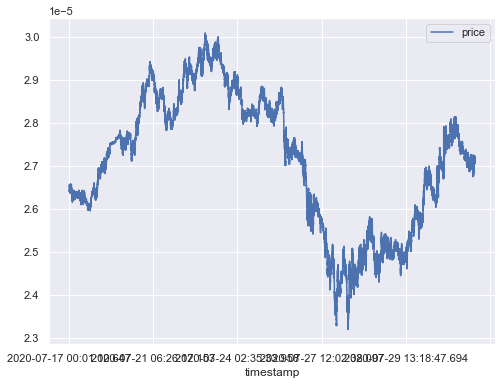

In [15]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



data = pd.read_csv(r"C:\Users/Hp/Desktop/challenge/trades.csv")
  
df = pd.DataFrame(data,columns=['timestamp','price',])

df.plot(x ='timestamp', y='price', kind = 'line')

plt.show()

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



data = pd.read_csv(r"C:\Users/Hp/Desktop/challenge/trades.csv")
  
df = pd.DataFrame(data,columns=['timestamp','amount',])

df.plot(x ='timestamp', y='price', kind = 'bar')

plt.bar(df.index, df["timestamp"])
plt.show()

KeyError: 'price'

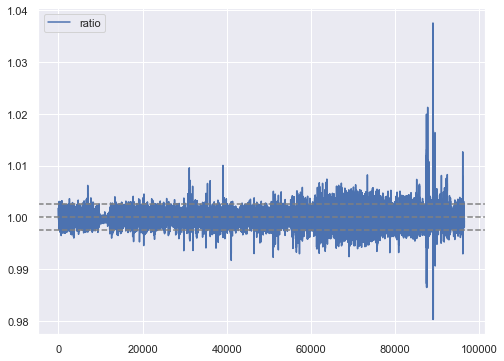

In [16]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,6
import seaborn as sb
sb.set()



data = pd.read_csv(r"C:\Users/Hp/Desktop/challenge/trades.csv")
  
finalprice = pd.DataFrame(data,columns=['timestamp','price',])

finalprice.head()

ma = 21
finalprice['returns'] = np.log(finalprice["price"]).diff()
finalprice['ma'] = finalprice['price'].rolling(ma).mean()
finalprice['ratio'] = finalprice['price'] / finalprice['ma']
finalprice['ratio'].describe()

percentiles = [5, 10, 50, 90, 95]
p = np.percentile(finalprice['ratio'].dropna(), percentiles)

finalprice['ratio'].dropna().plot(legend = True)
plt.axhline(p[0], c= (.5,.5,.5), ls='--')
plt.axhline(p[2], c= (.5,.5,.5), ls='--')
plt.axhline(p[-1], c= (.5,.5,.5), ls='--');

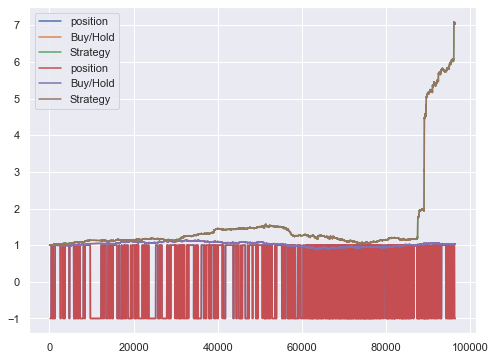

In [17]:
short = p[-1]
long = p[0]
finalprice['position'] = np.where(finalprice.ratio > short, -1, np.nan)
finalprice['position'] = np.where(finalprice.ratio < long, 1, finalprice['position'])
finalprice['position'] = finalprice['position'].ffill()



finalprice.position.dropna().plot()

finalprice['strat_return'] = finalprice['returns'] * finalprice['position'].shift()
plt.plot(np.exp(finalprice['returns'].dropna()).cumprod(), label='Buy/Hold')
plt.plot(np.exp(finalprice['strat_return'].dropna()).cumprod(), label='Strategy')
plt.legend();
short = p[-1]
long = p[0]
finalprice['position'] = np.where(finalprice.ratio > short, -1, np.nan)
finalprice['position'] = np.where(finalprice.ratio < long, 1, finalprice['position'])
finalprice['position'] = finalprice['position'].ffill()



finalprice.position.dropna().plot()

finalprice['strat_return'] = finalprice['returns'] * finalprice['position'].shift()
plt.plot(np.exp(finalprice['returns'].dropna()).cumprod(), label='Buy/Hold')
plt.plot(np.exp(finalprice['strat_return'].dropna()).cumprod(), label='Strategy')
plt.legend();


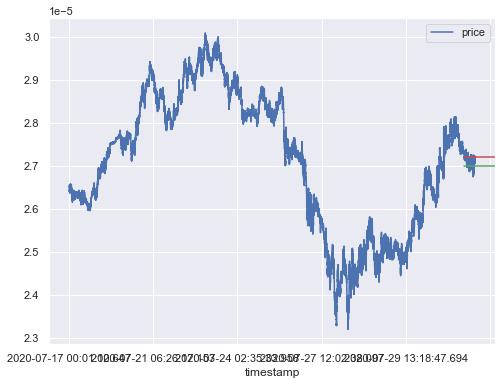

In [11]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



data = pd.read_csv(r"C:\Users/Hp/Desktop/challenge/trades.csv")
  
df = pd.DataFrame(data,columns=['timestamp','price',])

df.plot(x ='timestamp', y='price', kind = 'line')

plt.axhline(y = 0.0000272, xmin=0.93, xmax=1.5, color = 'r', linestyle = '-')
plt.axhline(y = 0.000027, xmin=0.93, color = 'g', linestyle = '-')


plt.show()

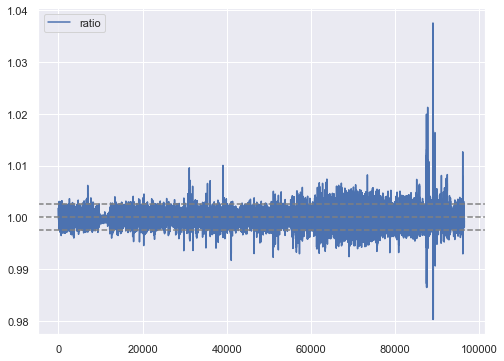

In [3]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,6
import seaborn as sb
sb.set()



data = pd.read_csv(r"C:\Users/Hp/Desktop/challenge/trades.csv")
  
testformeanrevlvls = pd.DataFrame(data,columns=['timestamp','price',])

testformeanrevlvls.head()

ma = 21
testformeanrevlvls['returns'] = np.log(testformeanrevlvls["price"]).diff()
testformeanrevlvls['ma'] = testformeanrevlvls['price'].rolling(ma).mean()
testformeanrevlvls['ratio'] = testformeanrevlvls['price'] / testformeanrevlvls['ma']
testformeanrevlvls['ratio'].describe()

percentstobouncefrom = [5, 10, 50, 90, 95]
p = np.percentile(testformeanrevlvls['ratio'].dropna(), percentstobouncefrom)

testformeanrevlvls['ratio'].dropna().plot(legend = True)
plt.axhline(p[0], c= (.5,.5,.5), ls='--')
plt.axhline(p[2], c= (.5,.5,.5), ls='--')
plt.axhline(p[-1], c= (.5,.5,.5), ls='--');
